In [23]:
# IMPORTS
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [24]:
print('Reading files.....')

# Initialize paths for each file
train_series_path = ""
test_series_path = ""
train_events_path = ""
filtered_train_series_path = ""

# Traverse files in the /kaggle/input directory
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
        # Detect paths for each file
        if filename == 'train_series.parquet':
            train_series_path = os.path.join(dirname, filename)
        elif filename == 'test_series.parquet':
            test_series_path = os.path.join(dirname, filename)
        elif filename == 'train_events.csv':
            train_events_path = os.path.join(dirname, filename)
        elif filename == 'filtered_train_series.csv':
            filtered_train_series_path = os.path.join(dirname, filename)

# Read files once paths are set
train_series = pd.read_parquet(train_series_path)
test_series  = pd.read_parquet(test_series_path)
train_events = pd.read_csv(train_events_path)
train_series_filtered = pd.read_csv(filtered_train_series_path)

print('.....done!')

Reading files.....
/kaggle/input/filtered-train-series/filtered_train_series.csv
/kaggle/input/child-mind-institute-detect-sleep-states/train_series.parquet
/kaggle/input/child-mind-institute-detect-sleep-states/sample_submission.csv
/kaggle/input/child-mind-institute-detect-sleep-states/train_events.csv
/kaggle/input/child-mind-institute-detect-sleep-states/test_series.parquet
.....done!


# **TRAIN SERIES VIZUALIZATION**
---

In [5]:
train_series

,series_id,step,timestamp,anglez,enmo
0,038441c925bb,0,2018-08-14T15:30:00-0400,2.636700,0.0217
1,038441c925bb,1,2018-08-14T15:30:05-0400,2.636800,0.0215
2,038441c925bb,2,2018-08-14T15:30:10-0400,2.637000,0.0216
3,038441c925bb,3,2018-08-14T15:30:15-0400,2.636800,0.0213
4,038441c925bb,4,2018-08-14T15:30:20-0400,2.636800,0.0215
...,...,...,...,...,...
127946335,fe90110788d2,592375,2017-09-08T00:14:35-0400,-27.277500,0.0204
127946336,fe90110788d2,592376,2017-09-08T00:14:40-0400,-27.032499,0.0233
127946337,fe90110788d2,592377,2017-09-08T00:14:45-0400,-26.841200,0.0202
127946338,fe90110788d2,592378,2017-09-08T00:14:50-0400,-26.723900,0.0199


In [73]:
train_series.describe()

,step,anglez,enmo
count,1.279463e+08,1.279463e+08,1.279463e+08
mean,2.548048e+05,-8.810453e+00,4.131503e-02
std,1.778930e+05,3.552188e+01,1.018289e-01
min,0.000000e+00,-9.000000e+01,0.000000e+00
25%,1.158120e+05,-3.185890e+01,1.300000e-03
50%,2.345190e+05,-9.597900e+00,1.720000e-02
75%,3.571960e+05,1.130020e+01,4.370000e-02
max,1.433879e+06,9.000000e+01,1.143370e+01


In [12]:
print(f"Total amount of unique SeriesIDs: {len(train_series['series_id'].unique())}\n")

nan_counts_train = train_series.isnull().sum() 
print(f"Amount of missing values per column:\n{nan_counts_train}")

Total amount of unique SeriesIDs: 277

Amount of missing values per column:
series_id    0
step         0
timestamp    0
anglez       0
enmo         0
dtype: int64


We can see that `train_series` is composed of :
- 127,946,340 rows for 277 individuals
- 5 columns : `series_id`, `step`, `timestamp`, `anglez` and `enmo`.


There are no missing values in our dataset.

Text(0.5, 1.0, 'Correlation Matrix')

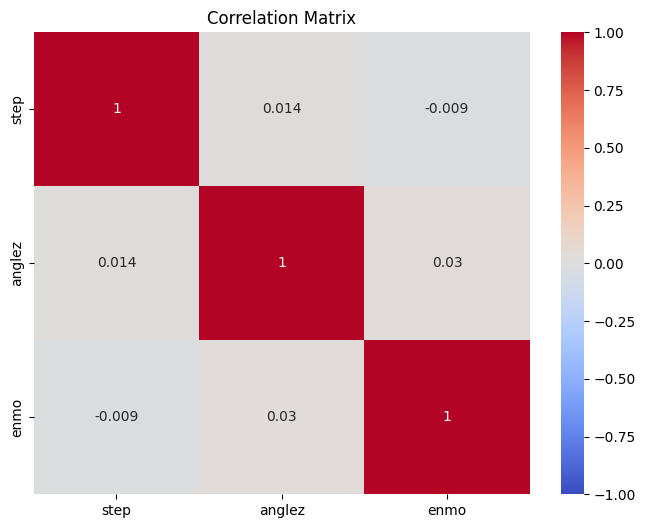

In [75]:
# Calculate the correlation matrix
corr_matrix = train_series[['step', 'anglez', 'enmo']].corr()

# Visualize the correlation matrix with a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')

Each variable, as expected, shows a correlation of 1 with itself along the diagonal of the matrix, where `step`, `anglez`, and `enmo`  each display perfect self-correlation (highlighted in deep red).

The correlation between `anglez` and `enmo`  is only 0.03, indicating a very weak positive relationship. This low value suggests minimal linear dependency, meaning that changes in `anglez` do not reliably correspond with changes in `enmo`. Consequently, these two variables provide distinct types of information.

While both `anglez` and `enmo`  can be used to visually differentiate states—such as being awake and wearing the accelerometer, being asleep and wearing it, or not wearing it at all—each variable captures unique aspects of movement and orientation. This distinction is essential, as the two variables contribute different perspectives on the data.

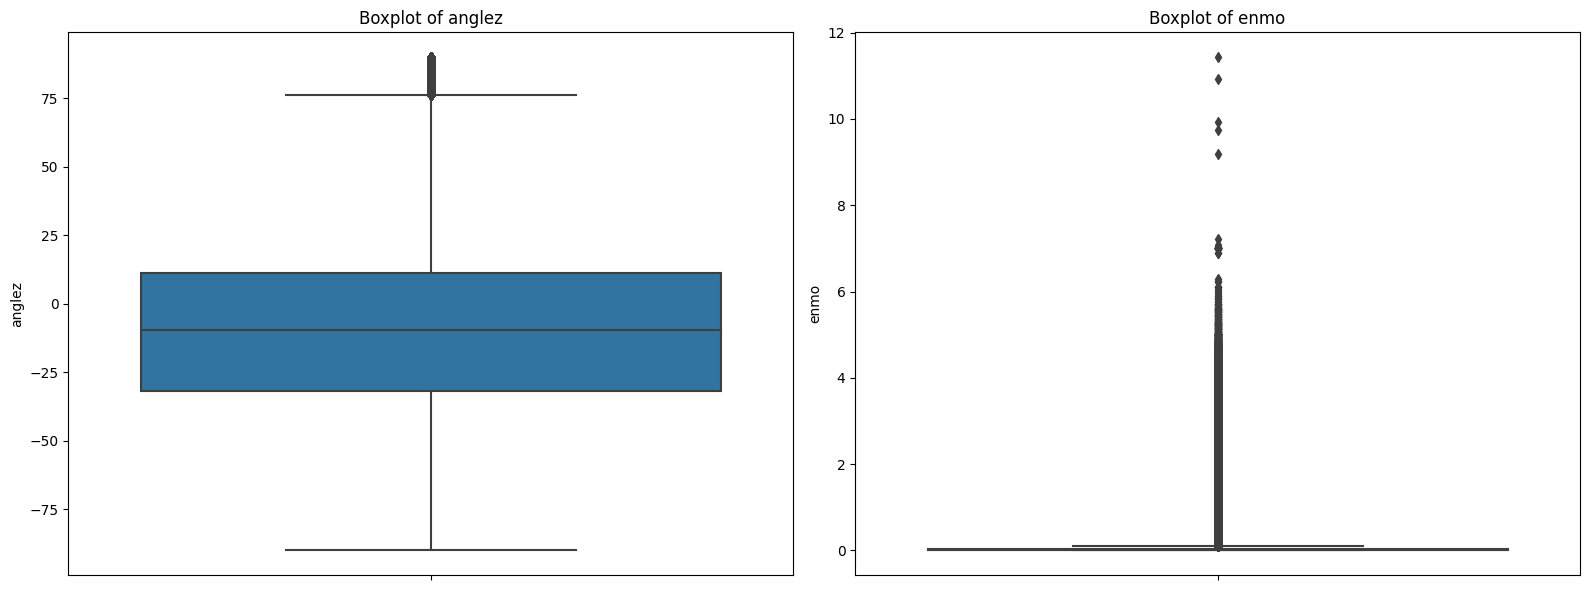

In [76]:
# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Boxplot for 'anglez'
sns.boxplot(y=train_series['anglez'], ax=axes[0])
axes[0].set_title('Boxplot of anglez')

# Boxplot for 'enmo'
sns.boxplot(y=train_series['enmo'], ax=axes[1])
axes[1].set_title('Boxplot of enmo')

# Adjust the layout for better visualization
plt.tight_layout()
plt.show()

The boxplots provide insights into the distribution and variability of `anglez` and `enmo`, revealing notable differences in the characteristics captured by these two metrics.

The boxplot for `anglez` (left) shows that values are spread across a range from approximately -75 to +75, indicating consistent changes in arm orientation both positively and negatively along the z-axis. The distribution appears relatively symmetrical, with the median positioned near the center of the interquartile range (IQR). This suggests that `anglez` values are fairly normally distributed, capturing the natural variations in arm angles. Additionally, a few outliers above +75 indicate occasional extreme values, likely due to specific movements or unusual arm positions.

We can see that `enmo` values are heavily skewed towards zero, with most values clustered near the lower end of the plot, indicating extended periods of inactivity or minimal movement. According to the GGIR package, `enmo` (Euclidean Norm Minus One) is calculated as the magnitude of acceleration from the accelerometer’s x, y, and z axes, with any negative values rounded to zero. This means that low enmo values indicate minimal or no movement, while larger values (seen as outliers) represent more intense activity. These outliers, extending up to around 10, likely correspond to bursts of physical activity.

# **FILTERED TRAIN SERIES VISUALIZATION**
---

In [26]:
train_series_filtered

,series_id,step,timestamp,anglez,enmo,event
0,038441c925bb,16,2018-08-14T15:31:20-0400,2.4129,0.0215,0.0
1,038441c925bb,93947,2018-08-20T01:58:55-0400,-75.0758,0.0174,0.0
2,038441c925bb,198000,2018-08-26T02:30:00-0400,-68.8499,0.0172,0.0
3,038441c925bb,333483,2018-09-02T22:40:15-0400,-0.4564,0.0056,0.0
4,038441c925bb,100770,2018-08-20T11:27:30-0400,37.1165,0.0298,0.0
...,...,...,...,...,...,...
991072,fe90110788d2,529104,2017-09-04T08:22:00-0400,-28.0780,0.0000,2.0
991073,fe90110788d2,538956,2017-09-04T22:03:00-0400,38.2396,0.0000,1.0
991074,fe90110788d2,547152,2017-09-05T09:26:00-0400,-56.7689,0.0042,2.0
991075,fe90110788d2,556560,2017-09-05T22:30:00-0400,-16.5867,0.0000,1.0


In [27]:
train_series_filtered.describe()

,step,anglez,enmo,event
count,9.910770e+05,991077.00000,991077.000000,991077.000000
mean,2.481272e+05,-9.00802,0.040646,0.014097
std,1.762541e+05,37.09559,0.104247,0.152531
min,4.000000e+00,-90.00000,0.000000,0.000000
25%,1.093950e+05,-34.97110,0.000400,0.000000
50%,2.297720e+05,-10.07660,0.015500,0.000000
75%,3.471300e+05,13.43660,0.041400,0.000000
max,1.362054e+06,90.00000,5.430300,2.000000


In [28]:
print(f"Total amount of unique SeriesIDs: {len(train_series_filtered['series_id'].unique())}\n")

nan_counts_filtered = train_series_filtered.isnull().sum() 
print(f"Amount of missing values per column:\n{nan_counts_filtered}")

Total amount of unique SeriesIDs: 269

Amount of missing values per column:
series_id    0
step         0
timestamp    0
anglez       0
enmo         0
event        0
dtype: int64


We can see that `train_series_filtered` is composed of :
- 991,077 rows for 269 individuals
- 6 columns : `series_id`, `step`, `timestamp`, `anglez`, `enmo`, and `event`.


There are no missing values in our dataset.
To briefly explain our pre-processing : We got rid of missing values (even if we get rid of a few individuals, it's still worth it seeing as we still have a lot of data to work with) as well as add the event column which corresponds to the following :
- 0.0 = no event
- 1.0 = onset
- 2.0 = wakeup 

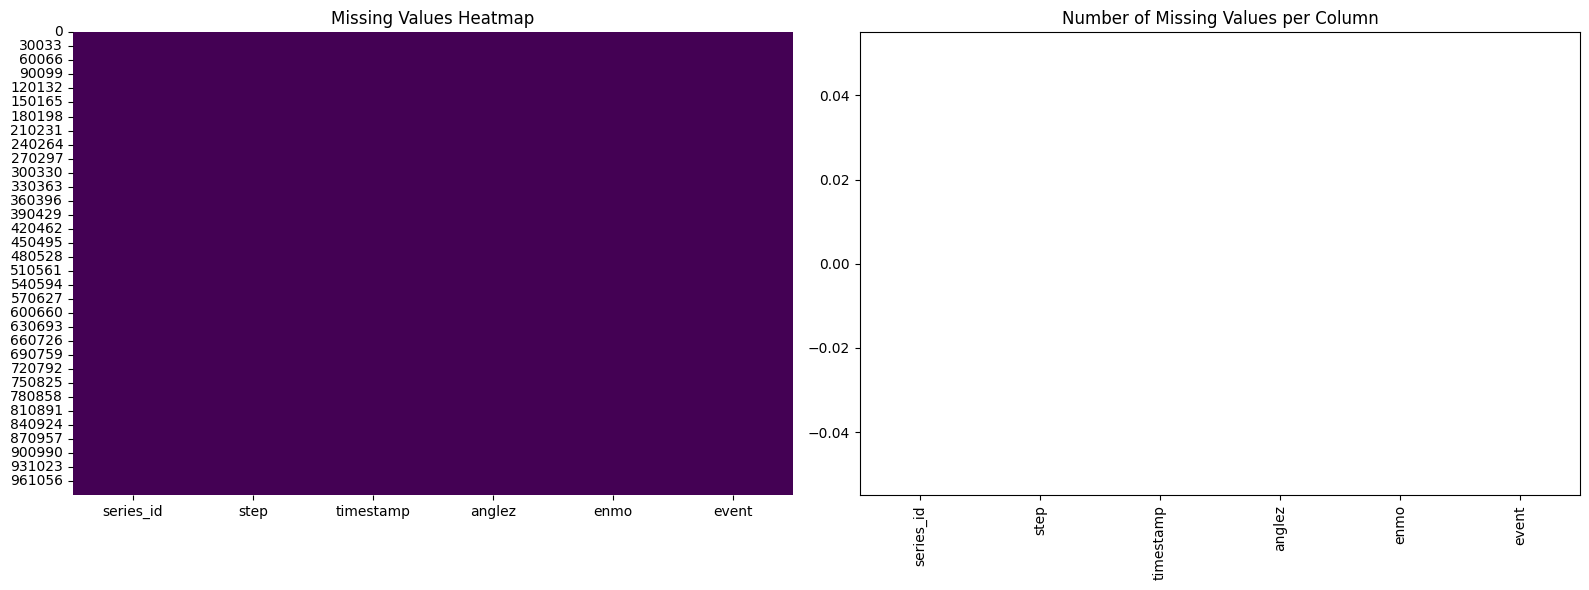

In [29]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Visualization of missing values (Heatmap)
sns.heatmap(train_series_filtered.isna(), cbar=False, cmap='viridis', ax=axes[0])
axes[0].set_title('Missing Values Heatmap')

# Number of missing values per column (Barplot)
train_series_filtered.isna().sum().plot(kind='bar', ax=axes[1])
axes[1].set_title('Number of Missing Values per Column')

# Display the plots
plt.tight_layout()
plt.show()

We can see that our filtered data does not have any missing values.

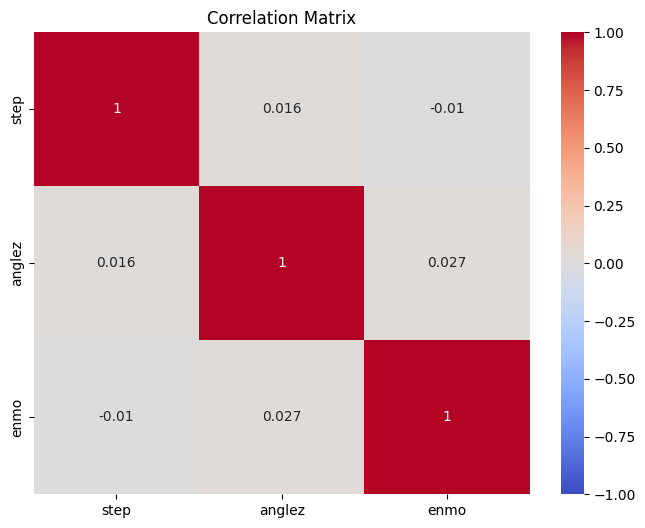

In [32]:
# Calculate the correlation matrix
corr_matrix = train_series_filtered[['step', 'anglez', 'enmo']].corr()

# Visualize the correlation matrix with a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

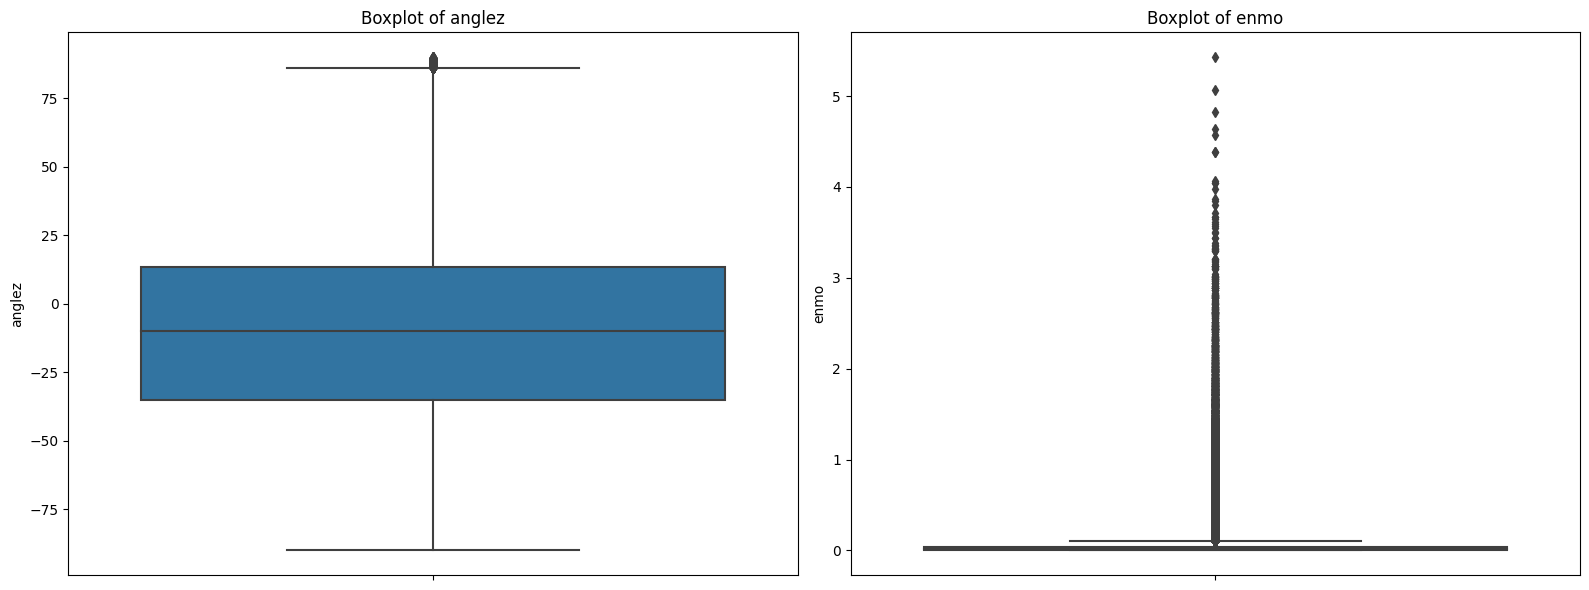

In [33]:
# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Boxplot for 'anglez'
sns.boxplot(y=train_series_filtered['anglez'], ax=axes[0])
axes[0].set_title('Boxplot of anglez')

# Boxplot for 'enmo'
sns.boxplot(y=train_series_filtered['enmo'], ax=axes[1])
axes[1].set_title('Boxplot of enmo')

# Adjust the layout for better visualization
plt.tight_layout()
plt.show()

# **TRAIN EVENTS VISUALIZATION**
---

In [70]:
train_events

,series_id,night,event,step,timestamp
0,038441c925bb,1,onset,4992.0,2018-08-14T22:26:00-0400
1,038441c925bb,1,wakeup,10932.0,2018-08-15T06:41:00-0400
2,038441c925bb,2,onset,20244.0,2018-08-15T19:37:00-0400
3,038441c925bb,2,wakeup,27492.0,2018-08-16T05:41:00-0400
4,038441c925bb,3,onset,39996.0,2018-08-16T23:03:00-0400
...,...,...,...,...,...
14503,fe90110788d2,33,wakeup,560604.0,2017-09-06T04:07:00-0400
14504,fe90110788d2,34,onset,574620.0,2017-09-06T23:35:00-0400
14505,fe90110788d2,34,wakeup,581604.0,2017-09-07T09:17:00-0400
14506,fe90110788d2,35,onset,NaN,NaN


In [50]:
train_events.describe()

,night,step
count,14508.000000,9585.000000
mean,15.120072,214352.123944
std,10.286758,141268.408192
min,1.000000,936.000000
25%,7.000000,95436.000000
50%,14.000000,200604.000000
75%,21.000000,317520.000000
max,84.000000,739392.000000


In [13]:
print(f"Total amount of unique SeriesIDs: {len(train_events['series_id'].unique())}\n")

nan_counts_events = train_events.isnull().sum() 
print(f"Amount of missing values per column:\n{nan_counts_events}")

Total amount of unique SeriesIDs: 277

Amount of missing values per column:
series_id       0
night           0
event           0
step         4923
timestamp    4923
dtype: int64


We can see that `train_events` is composed of :
- 14,508 rows for 277 individuals
- 5 columns : `series_id`, `night`, `event`, `step` and `timestamp`.


There are **4,923** missing values from `step` and `timestamp`.

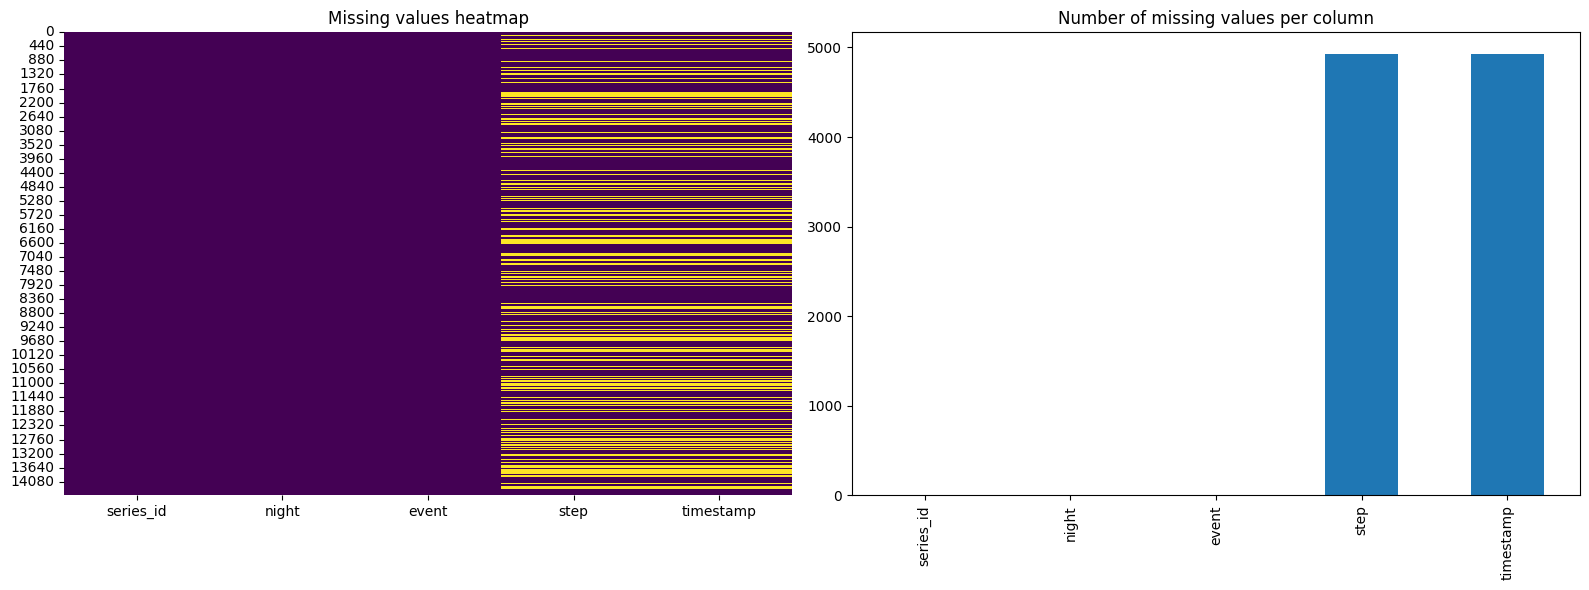

In [58]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Visualization of the missing values (Heatmap)
sns.heatmap(train_events.isna(), cbar=False, cmap='viridis', ax=axes[0])
axes[0].set_title('Missing values heatmap')

# Amount of NaNs per column (Barplot)
train_events.isna().sum().plot(kind='bar', ax=axes[1])
axes[1].set_title('Number of missing values per column')

# Display the plots
plt.tight_layout()
plt.show()

Missing values are evenly distributed across the dataset. They are the same for `step` and `timestamp`.

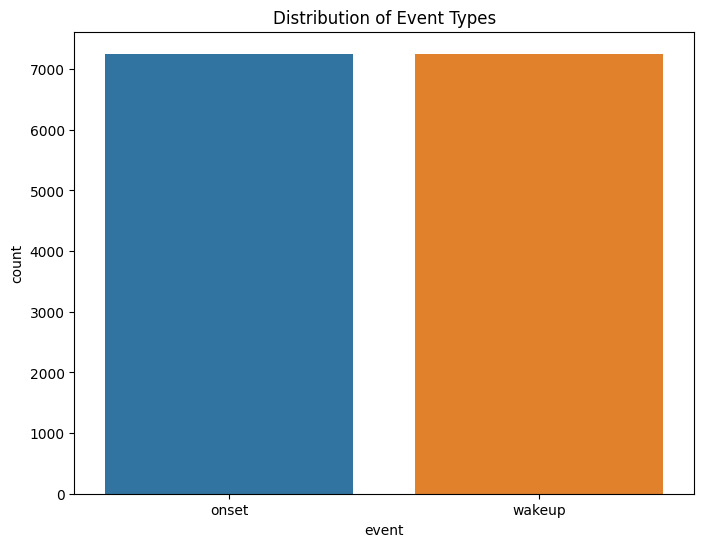

In [14]:
# Count the frequency of different event types
plt.figure(figsize=(8, 6))
sns.countplot(x='event', data=train_events)
plt.title('Distribution of Event Types')
plt.show()

The distribution of event types is the same for **onset** and **wakeup**

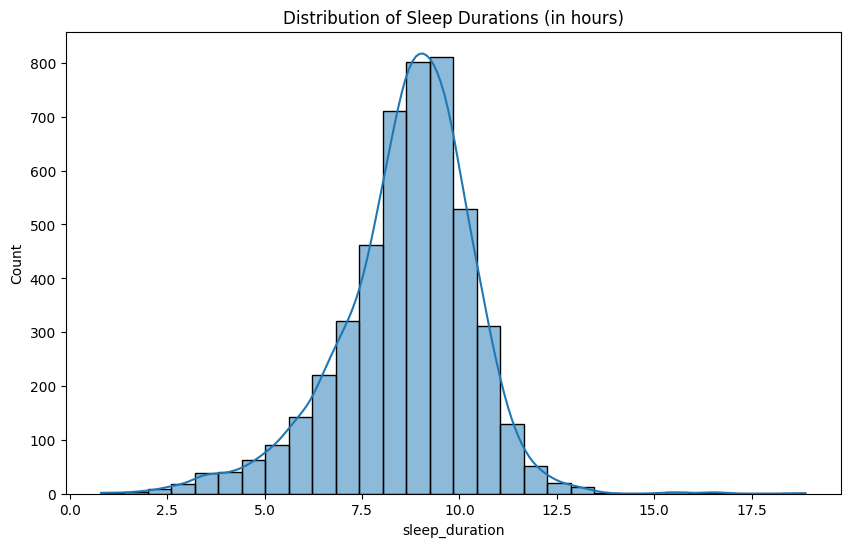

In [15]:
# Convert timestamps to datetime in the original DataFrame
train_events['timestamp'] = pd.to_datetime(train_events['timestamp']).apply(lambda t: t.tz_localize(None))

# Create separate DataFrames for ‘onset’ and ‘wakeup’ events
onset_df = train_events[train_events['event'] == 'onset']
wakeup_df = train_events[train_events['event'] == 'wakeup']

# Merge onset and wakeup on ‘series_id’ and ‘night’ for each night
sleep_durations = pd.merge(onset_df, wakeup_df, on=['series_id', 'night'], suffixes=('_onset', '_wakeup'))

# Ensure that timestamp columns are of type datetime
sleep_durations['timestamp_onset'] = pd.to_datetime(sleep_durations['timestamp_onset'], errors='coerce')
sleep_durations['timestamp_wakeup'] = pd.to_datetime(sleep_durations['timestamp_wakeup'], errors='coerce')

# Calculate the length of each night in hours
sleep_durations['sleep_duration'] = (sleep_durations['timestamp_wakeup'] - sleep_durations['timestamp_onset']).dt.total_seconds() / 3600

# Visualisation of sleep times
plt.figure(figsize=(10, 6))
sns.histplot(sleep_durations['sleep_duration'], bins=30, kde=True)
plt.title('Distribution of Sleep Durations (in hours)')
plt.show()

Sleep duration appears to follow a normal distribution centred around **9 hours** of sleep.

In [20]:
events

,series_id,night,event,step,timestamp
0,038441c925bb,1,onset,4992.0,2018-08-14 22:26:00
1,038441c925bb,1,wakeup,10932.0,2018-08-15 06:41:00
2,038441c925bb,2,onset,20244.0,2018-08-15 19:37:00
3,038441c925bb,2,wakeup,27492.0,2018-08-16 05:41:00
4,038441c925bb,3,onset,39996.0,2018-08-16 23:03:00
...,...,...,...,...,...
14503,fe90110788d2,33,wakeup,560604.0,2017-09-06 04:07:00
14504,fe90110788d2,34,onset,574620.0,2017-09-06 23:35:00
14505,fe90110788d2,34,wakeup,581604.0,2017-09-07 09:17:00
14506,fe90110788d2,35,onset,NaN,NaT


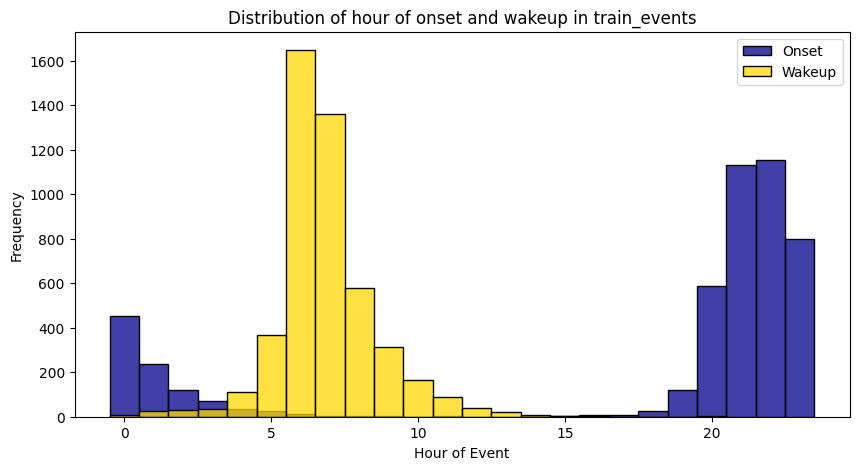

In [22]:
# Set figure size
plt.figure(figsize=(10, 5))

onset_df['hour'] = onset_df["timestamp"].dt.hour
wakeup_df['hour'] = wakeup_df["timestamp"].dt.hour

# Plotting the distribution plot for onset events
sns.histplot(onset_df['hour'].dropna(), kde=False, bins=12, label='Onset', discrete=True, color='darkblue')

# Plotting the distribution plot for wakeup events
sns.histplot(wakeup_df['hour'].dropna(), kde=False, bins=12, label='Wakeup', discrete=True, color='gold')

# Adding labels and title
plt.xlabel('Hour of Event')
plt.ylabel('Frequency')
plt.title('Distribution of hour of onset and wakeup in train_events')
plt.legend()

# Show the plot
plt.show()

We can see that the majority of people wake up between 5am and 10am and fall asleep between 8pm and 1am.

In [6]:
# Step 1: Filter data for the specified series_id and ensure distinct days are selected
series_id = 'f564985ab692'
sample_data = train_series[train_series['series_id'] == series_id].copy()
sample_events = train_events[train_events['series_id'] == series_id].copy()

# Step 2: Convert timestamps to datetime and remove timezones to prevent repetition issues
sample_data['timestamp'] = pd.to_datetime(sample_data['timestamp']).dt.tz_localize(None)
sample_data['date'] = sample_data['timestamp'].dt.date

sample_events['timestamp'] = pd.to_datetime(sample_events['timestamp']).dt.tz_localize(None)
sample_events['date'] = sample_events['timestamp'].dt.date

# Step 3: Select only data for the first X days
days_to_view = 5
unique_dates = sample_data['date'].unique()[:days_to_view] 
sample_data = sample_data[sample_data['date'].isin(unique_dates)]
sample_events = sample_events[sample_events['date'].isin(unique_dates)]

# Step 4: Separate onset and wakeup events for labeling
sample_onset = sample_events[sample_events['event'] == 'onset']['step'].dropna()
sample_wakeup = sample_events[sample_events['event'] == 'wakeup']['step'].dropna()

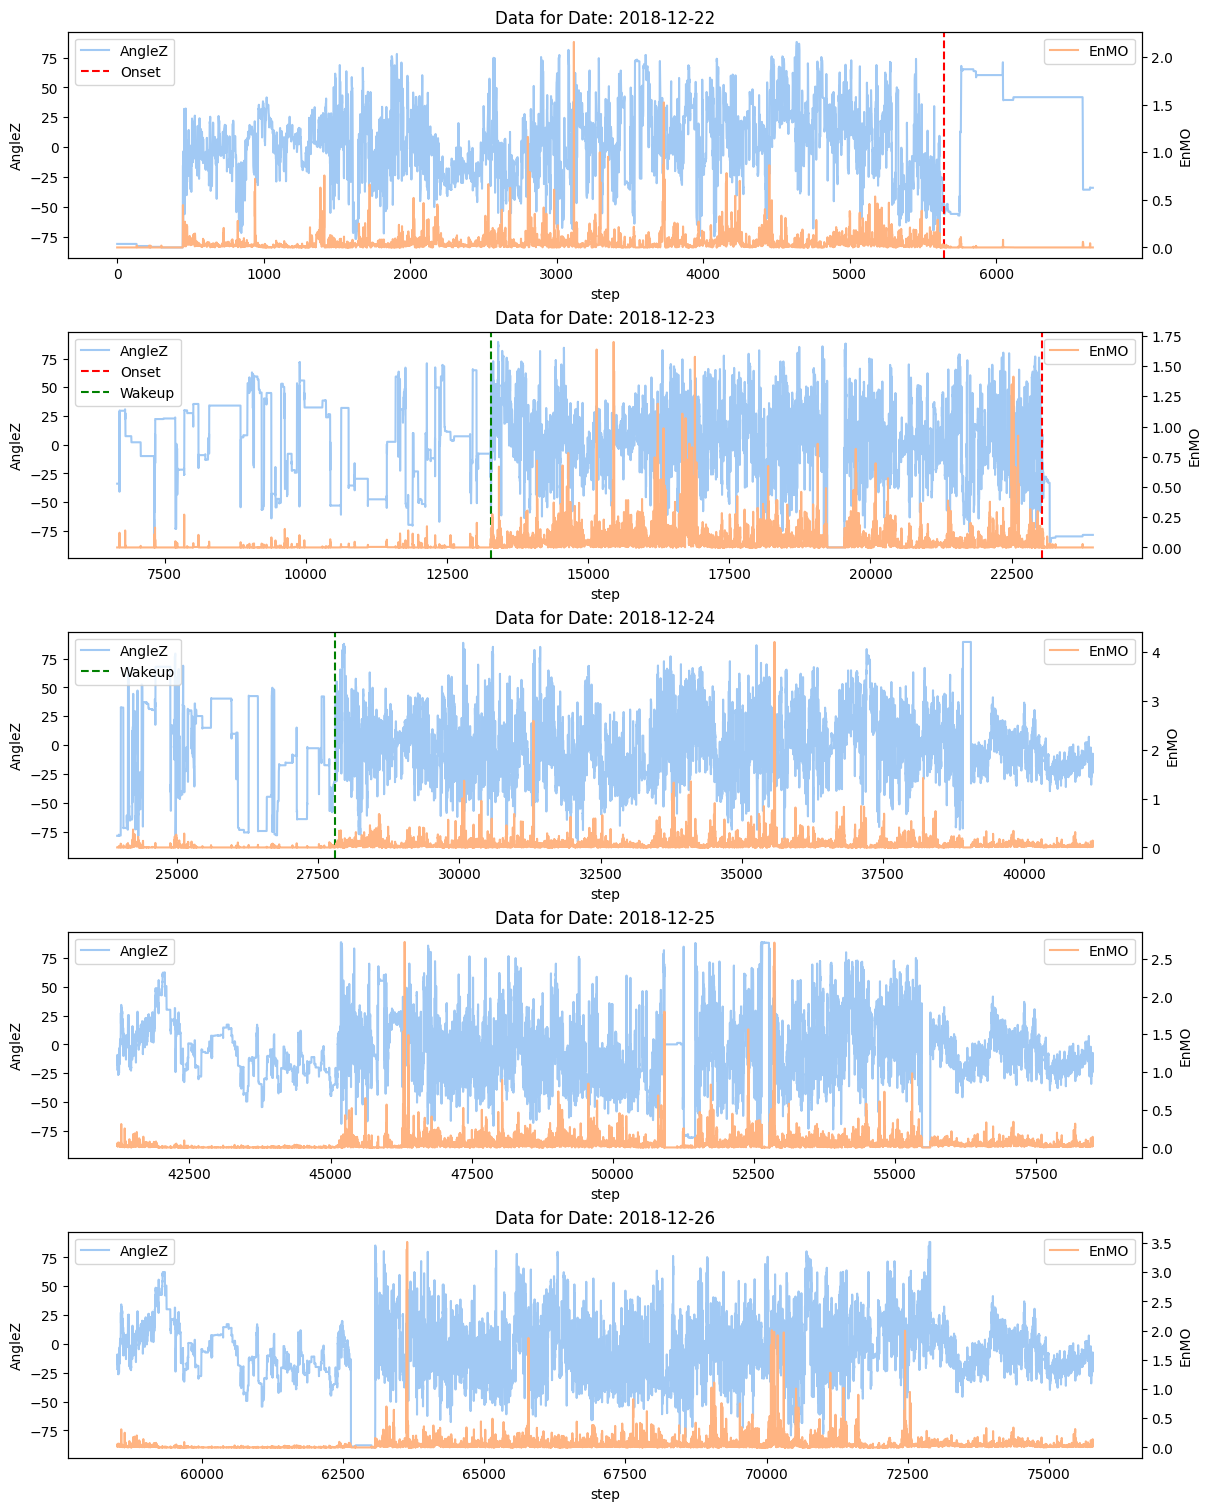

In [9]:
# Define pastel colors
anglez_color = sns.color_palette("pastel")[0]  # Light blue
enmo_color = sns.color_palette("pastel")[1]    # Light orange

# Setting up the grid for multiple plots by day
dates = sample_data['date'].unique()
num_dates = len(dates)
fig, axes = plt.subplots(num_dates, 1, figsize=(12, num_dates * 3), sharex=False, constrained_layout=True)

# Loop over each unique date and plot anglez and enmo for that day
for i, date in enumerate(dates):
    daily_data = sample_data[sample_data['date'] == date]
    min_step, max_step = daily_data['step'].min(), daily_data['step'].max()
    
    # Plot anglez on the primary y-axis
    sns.lineplot(data=daily_data, x='step', y='anglez', ax=axes[i], label='AngleZ', color=anglez_color)
    axes[i].set_title(f"Data for Date: {date}")
    axes[i].set_ylabel("AngleZ")
    
    # Create a secondary y-axis for enmo
    ax2 = axes[i].twinx()
    sns.lineplot(data=daily_data, x='step', y='enmo', ax=ax2, label='EnMO', color=enmo_color)
    ax2.set_ylabel("EnMO")

    # Filter onset and wakeup steps for the current date's step range
    onset_steps = sample_onset[(sample_onset >= min_step) & (sample_onset <= max_step)].values
    wakeup_steps = sample_wakeup[(sample_wakeup >= min_step) & (sample_wakeup <= max_step)].values
    
    # Add onset and wakeup markers
    for onset_step in onset_steps:
        axes[i].axvline(x=onset_step, color='red', linestyle='--', label='Onset')
    for wakeup_step in wakeup_steps:
        axes[i].axvline(x=wakeup_step, color='green', linestyle='--', label='Wakeup')

    # Add legends for anglez, enmo, onset, and wakeup
    axes[i].legend(loc='upper left') # Wakeup doesn't show up ?
    ax2.legend(loc='upper right')

    
# Common x-axis label
plt.xlabel("Step")
plt.show()

These plots illustrate the daily time series of `anglez` and `enmo`, for a specific individual (`series_id` = f564985ab692) over five consecutive days. Each plot represents one day of data, with `anglez` shown on the primary y-axis (blue line) and `enmo` on the secondary y-axis (orange line). Additionally, the sleep events for this individual, specifically Onset (green vertical line) and Wakeup (red vertical line), have been added.


With this example, we can clearly see the difference in how the following three situations get recorded :
- **Being awake while weraing the accelerometer** : This state is characterized by high variability in both `anglez` and `enmo`. `anglez` fluctuates significantly, ranging from approximately +75 to -75, while `enmo` displays multiple peaks, reaching around 0.25 to 0.4. This pattern indicates active movement, as shown in sections like steps ~500 to ~5,500.

- **Being asleep while wearing the accelerometer** : During sleep, movement tends to be more sporadic, often characterized by "jump processes" in `anglez` where there are abrupt shifts in values rather than continuous activity. This is visible in sections such as steps ~5,500 to ~13,000, where the changes in `anglez` and `enmo` appear less frequent and more intermittent, indicating periods of reduced movement typical of sleep.

- **Not Wearing the accelormeter** : In this scenario, the data shows repetitive, consistent blocks with little to no variability (e.g. `anglez` ranging from +25 to -25). This lack of fluctuation in both `anglez` and `enmo` indicates that the device was likely not worn, as seen in sections like steps ~39,000 to ~45,000 and steps ~57,000 to ~62,500. These sections lack the natural variability seen in active or even sleeping states, reinforcing the likelihood that the accelerometer was stationary or not in use. **These periods where the person doesn't wear the accelerometer correspond to the NaNs in our train_events dataset since we can't establish an onset or wakeup event from that data. This is why we needed to preprocess/filter our data.**



# **TEST SERIES VISUALIZATION**
---

In [38]:
test_series

,series_id,step,timestamp,anglez,enmo
0,038441c925bb,0,2018-08-14 19:30:00+00:00,2.636700,0.0217
1,038441c925bb,1,2018-08-14 19:30:05+00:00,2.636800,0.0215
2,038441c925bb,2,2018-08-14 19:30:10+00:00,2.637000,0.0216
3,038441c925bb,3,2018-08-14 19:30:15+00:00,2.636800,0.0213
4,038441c925bb,4,2018-08-14 19:30:20+00:00,2.636800,0.0215
...,...,...,...,...,...
445,0402a003dae9,145,2018-12-18 17:57:05+00:00,-59.696899,0.0601
446,0402a003dae9,146,2018-12-18 17:57:10+00:00,-35.656601,0.0427
447,0402a003dae9,147,2018-12-18 17:57:15+00:00,-21.582399,0.0309
448,0402a003dae9,148,2018-12-18 17:57:20+00:00,-42.616001,0.0328


In [39]:
test_series.describe()

,step,anglez,enmo
count,450.0000,450.000000,450.000000
mean,74.5000,-56.177723,0.030276
std,43.3485,39.331936,0.067950
min,0.0000,-88.367996,0.000000
25%,37.0000,-88.216599,0.000000
50%,74.5000,-79.989449,0.013300
75%,112.0000,-29.100624,0.035250
max,149.0000,68.460503,0.980200


In [48]:
print(f"Total amount of unique seriesIDs: {len(test_series['series_id'].unique())}\n")
print(f"Total amount of unique seriesIDs: {len(test_series['series_id'].unique())}\n")

nan_counts_test = test_series.isnull().sum() 
print(f"Amount of missing values per column:\n{nan_counts_test}")
nan_counts_test = test_series.isnull().sum() 
print(f"Amount of missing values per column:\n{nan_counts_test}")

Total amount of unique seriesIDs: 3

Amount of missing values per column:
series_id    0
step         0
timestamp    0
anglez       0
enmo         0
dtype: int64


We can see that `test_series` is composed of :
- 450 rows for 3 individuals
- 5 columns : `series_id`, `step`, `timestamp`, `anglez` and `enmo`.


There are no missing values in this dataset.

In order to better visualize the data in the `test_series` dataset, we'll plot both `anglez` and `enmo` against `step` for each `series_id`.

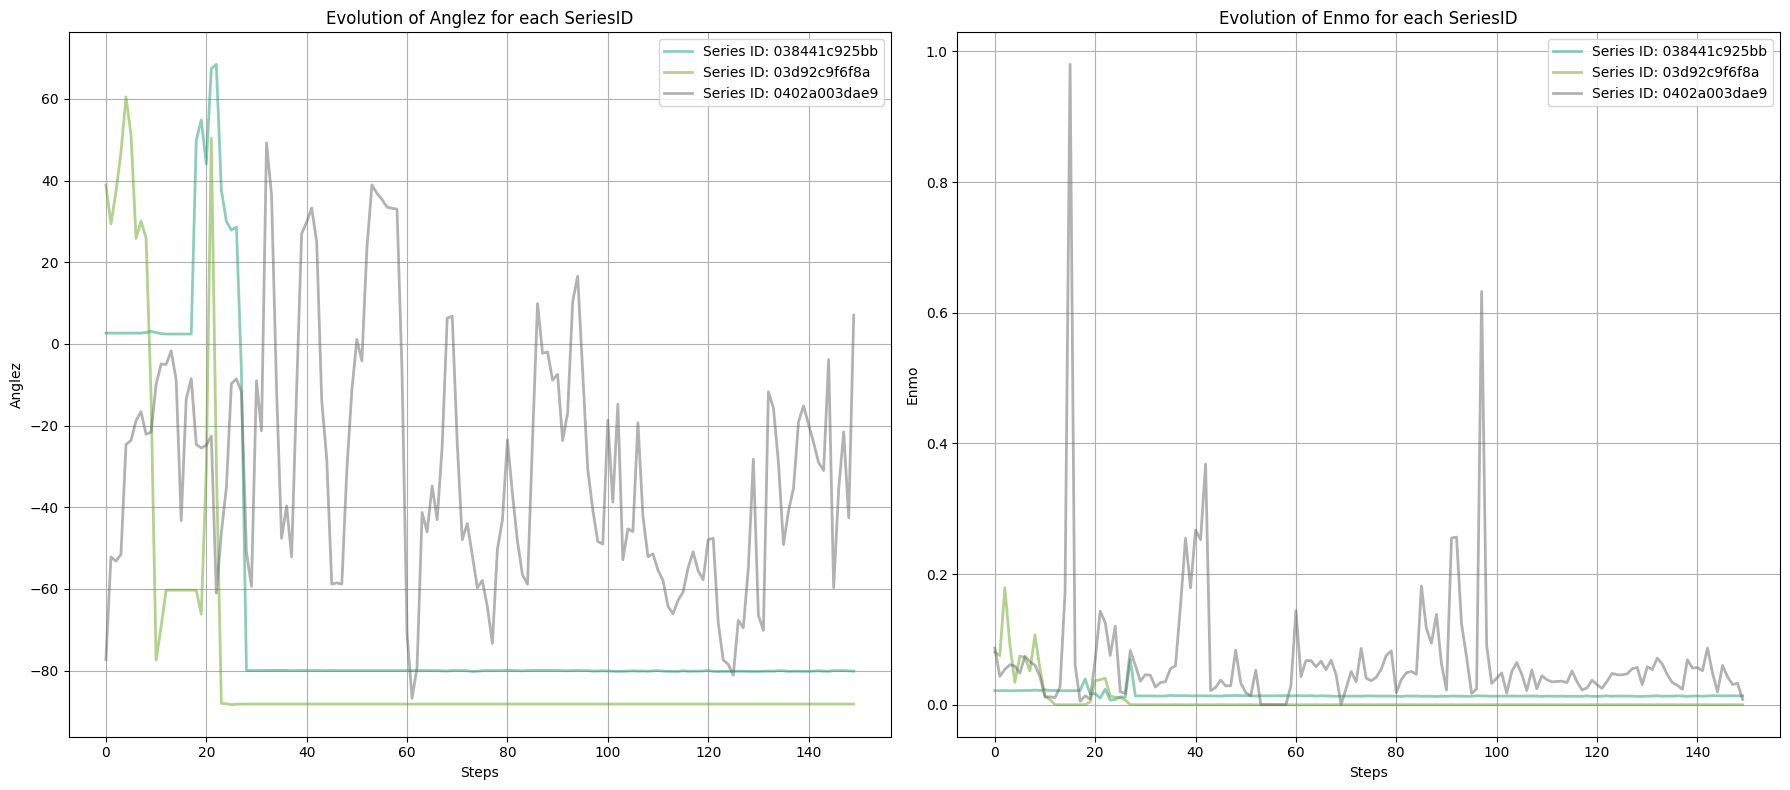

In [37]:
# Create a color map for unique series IDs
test_ids = test_series['series_id'].unique()
colors = plt.cm.Dark2(np.linspace(0, 1, len(test_ids)))  # Generate colors for each unique series ID

# Set up a figure with two subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(18, 8))  # 1 row, 2 columns

# Plot Evolution of Anglez for each Series ID on the first subplot
for color, series_id in zip(colors, test_ids):
    series_data = test_series[test_series['series_id'] == series_id]  # Filter data for each series_id
    axes[0].plot(series_data['step'], series_data['anglez'],
                 label=f'Series ID: {series_id}', color=color, alpha=0.5, linewidth=2)  # Plot anglez data

# Customize the first subplot
axes[0].set_title('Evolution of Anglez for each SeriesID')
axes[0].set_xlabel('Steps')
axes[0].set_ylabel('Anglez')
axes[0].legend()
axes[0].grid(True)

# Plot Evolution of Enmo for each Series ID on the second subplot
for color, series_id in zip(colors, test_ids):
    series_data = test_series[test_series['series_id'] == series_id]  # Filter data for each series_id
    axes[1].plot(series_data['step'], series_data['enmo'],
                 label=f'Series ID: {series_id}', color=color, alpha=0.5, linewidth=2)  # Plot enmo data

# Customize the second subplot
axes[1].set_title('Evolution of Enmo for each SeriesID')
axes[1].set_xlabel('Steps')
axes[1].set_ylabel('Enmo')
axes[1].legend()
axes[1].grid(True)

# Display the plots
plt.tight_layout()
plt.show()

The plots clearly depict movement and orientation patterns captured by the accelerometer for three individuals, highlighting differences in their recorded activities.

The main observation we can make is regarding the uniform duration of recorded steps for each individual: all three series contain **150 steps**, equivalent to **12.5 minutes** (1 step = 5 seconds). This limited data suggests that the provided `test_series` dataset is incomplete. Through discussions on this issue, it’s understood that the complete `test_series` dataset is kept private and will replace the partial version once we submit our model for scoring. Thus, the limited data and shorter graphs in the public `test_series` dataset are expected.